This file loads csv data collected from our IMU, plots the accelerometer and gyroscope data, find peaks, and calculate stroke rate.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt




Data preview:
      Time  AccelX  AccelY  AccelZ  GyroX    GyroY   GyroZ
0  1035032    6424   -4356  -12584  575.0 -19282.0  8159.0
1  1035043    4780   -4000  -11976    5.0 -21684.0  7270.0
2  1035068    1036   -3512  -11308 -345.0 -23243.0  6281.0
3  1035080    -240   -3072  -10752  127.0 -21987.0  5730.0
4  1035092   -1308   -2456  -10324  945.0 -20070.0  4821.0


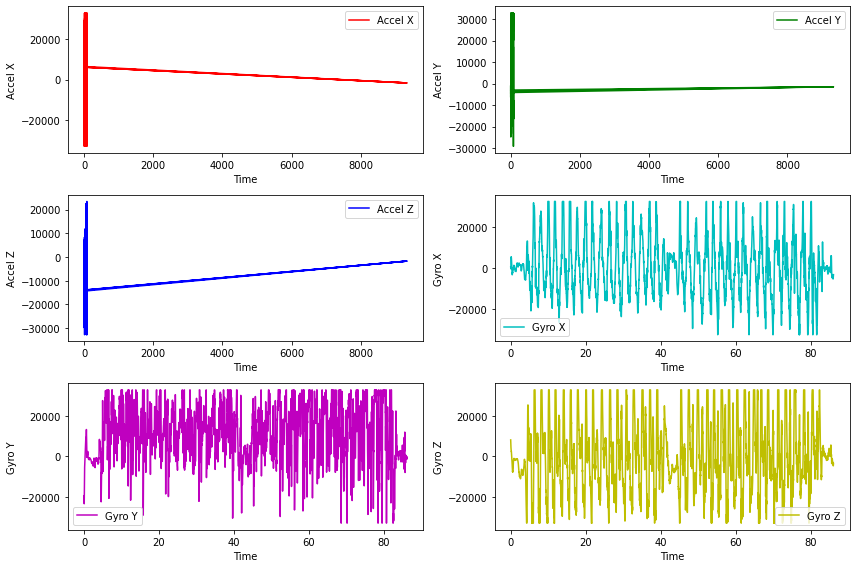

In [20]:
# FOR FORM TO ADJUST: File path to data
file_path = "../downloaded_files/IMU_0_00-17-14.csv"

data = pd.read_csv(file_path, on_bad_lines='skip') 

# Ignore this
data_set_temp_string = 'data6'
print("Data preview:")
print(data.head())

show_plots = True

# Extract the columns
timestamps = data['Time']
timestamps = timestamps - timestamps[0]
accel_x = data['AccelX']
accel_y = data['AccelY']
accel_z = data['AccelZ']
gyro_x = data['GyroX']
gyro_y = data['GyroY']
gyro_z = data['GyroZ']

# Adjust timestamps to match the length of smoothed data and convert to seconds
adjusted_timestamps = timestamps[:len(accel_x)] / 1000

import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter twice for extra smoothing
smoothed_accel_x = savgol_filter(savgol_filter(accel_x, window_length=75, polyorder=2), window_length=65, polyorder=2)
smoothed_accel_y = savgol_filter(savgol_filter(accel_y, window_length=75, polyorder=2), window_length=65, polyorder=2)
smoothed_accel_z = savgol_filter(savgol_filter(accel_z, window_length=75, polyorder=2), window_length=65, polyorder=2)
smoothed_gyro_x = savgol_filter(savgol_filter(gyro_x, window_length=75, polyorder=2), window_length=65, polyorder=2)
smoothed_gyro_y = savgol_filter(savgol_filter(gyro_y, window_length=75, polyorder=2), window_length=65, polyorder=2)
smoothed_gyro_z = savgol_filter(savgol_filter(gyro_z, window_length=75, polyorder=2), window_length=65, polyorder=2)


# Plot all six data series over time
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(adjusted_timestamps, accel_x, label='Accel X', color='r')
plt.xlabel('Time')
plt.ylabel('Accel X')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(adjusted_timestamps, accel_y, label='Accel Y', color='g')
plt.xlabel('Time')
plt.ylabel('Accel Y')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(adjusted_timestamps, accel_z, label='Accel Z', color='b')
plt.xlabel('Time')
plt.ylabel('Accel Z')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(adjusted_timestamps, gyro_x, label='Gyro X', color='c')
plt.xlabel('Time')
plt.ylabel('Gyro X')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(adjusted_timestamps, gyro_y, label='Gyro Y', color='m')
plt.xlabel('Time')
plt.ylabel('Gyro Y')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(adjusted_timestamps, gyro_z, label='Gyro Z', color='y')
plt.xlabel('Time')
plt.ylabel('Gyro Z')
plt.legend()

plt.tight_layout()
plt.show()


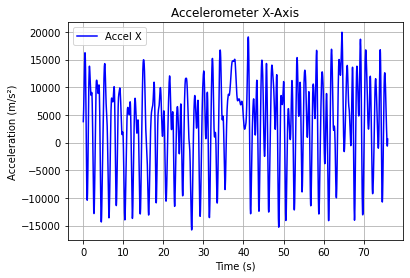

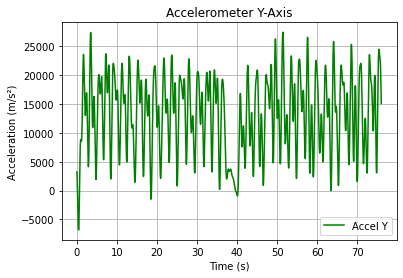

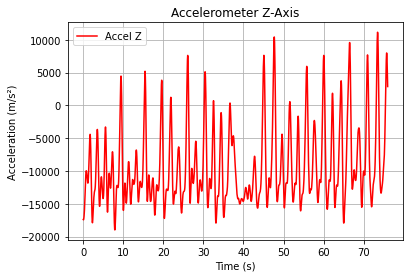

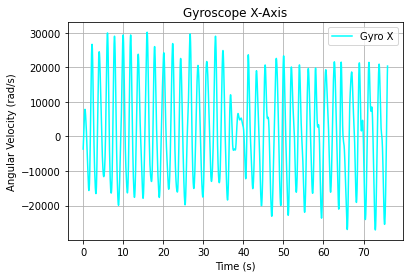

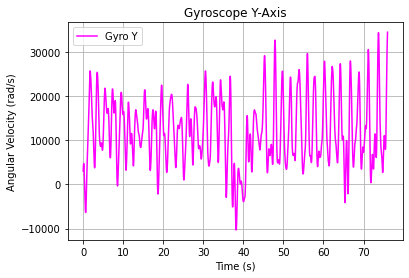

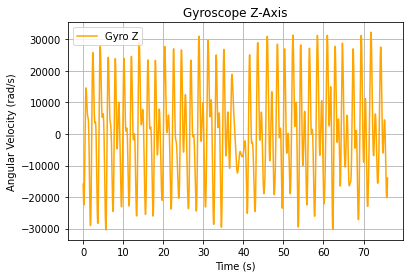

In [21]:
# FOR FORM TO ADJUST: Based on the above window, 
# extract a certain window to calculate the stroke rate for
x_min = 4
x_max = 80

# FOR FORM TO ADJUST:
# Input ground truth stroke rate (strokes / total time) 
# which will give an average stroke rate to compare to
gruond_truth_strokes = 36
ground_truth_sps = gruond_truth_strokes/(x_max-x_min)
ground_truth_spm = ground_truth_sps * 60

# Preprocessing: 2 iterations of Savitsky-Golay filtering

# Create mask for filtering
mask = (adjusted_timestamps >= x_min) & (adjusted_timestamps <= x_max)

# Apply filtering to all data arrays and timestamps
adjusted_timestamps = adjusted_timestamps[mask]
smoothed_accel_x = smoothed_accel_x[mask]
smoothed_accel_y = smoothed_accel_y[mask]
smoothed_accel_z = smoothed_accel_z[mask]
smoothed_gyro_x = smoothed_gyro_x[mask]
smoothed_gyro_y = smoothed_gyro_y[mask]
smoothed_gyro_z = smoothed_gyro_z[mask]

adjusted_timestamps = adjusted_timestamps - x_min

# Plot filtered data
def plot_series(timestamps, data, title, ylabel, color, label):
    plt.figure()
    plt.plot(timestamps, data, label=label, color=color)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Accelerometer plots
plot_series(adjusted_timestamps, smoothed_accel_x, "Accelerometer X-Axis", "Acceleration (m/s²)", 'blue', "Accel X")
plot_series(adjusted_timestamps, smoothed_accel_y, "Accelerometer Y-Axis", "Acceleration (m/s²)", 'green', "Accel Y")
plot_series(adjusted_timestamps, smoothed_accel_z, "Accelerometer Z-Axis", "Acceleration (m/s²)", 'red', "Accel Z")

# Gyroscope plots
plot_series(adjusted_timestamps, smoothed_gyro_x, "Gyroscope X-Axis", "Angular Velocity (rad/s)", 'cyan', "Gyro X")
plot_series(adjusted_timestamps, smoothed_gyro_y, "Gyroscope Y-Axis", "Angular Velocity (rad/s)", 'magenta', "Gyro Y")
plot_series(adjusted_timestamps, smoothed_gyro_z, "Gyroscope Z-Axis", "Angular Velocity (rad/s)", 'orange', "Gyro Z")


In [22]:
# SAVING BLOCK (Can ignore)

import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()  # This should be inside 'esp IMU'
parent_dir = os.path.dirname(current_dir)  # Go up one level
save_path = os.path.join(parent_dir, "six_file_analysis", data_set_temp_string)


# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

#  Define plot labels and data
plot_data = [
    ("Accelerometer X-Axis", "Acceleration (m/s^2)", "Accel_X.png", smoothed_accel_x, "blue"),
    ("Accelerometer Y-Axis", "Acceleration (m/s^2)", "Accel_Y.png", smoothed_accel_y, "green"),
    ("Accelerometer Z-Axis", "Acceleration (m/s^2)", "Accel_Z.png", smoothed_accel_z, "red"),
    ("Gyroscope X-Axis", "Angular Velocity (rad/s)", "Gyro_X.png", smoothed_gyro_x, "cyan"),
    ("Gyroscope Y-Axis", "Angular Velocity (rad/s)", "Gyro_Y.png", smoothed_gyro_y, "magenta"),
    ("Gyroscope Z-Axis", "Angular Velocity (rad/s)", "Gyro_Z.png", smoothed_gyro_z, "orange"),
]

# Generate and save plots
for title, ylabel, filename, data, color in plot_data:
    plt.figure()
    plt.plot(adjusted_timestamps, data, label=title.split()[1], color=color)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.savefig(os.path.join(save_path, filename))  # Save the plot
    plt.close()  # Close the figure to free memory

print(f"Plots saved successfully in {save_path}")

Plots saved successfully in c:\Users\iddos\Desktop\UBC\BMEG 457\FORM24\six_file_analysis\data6


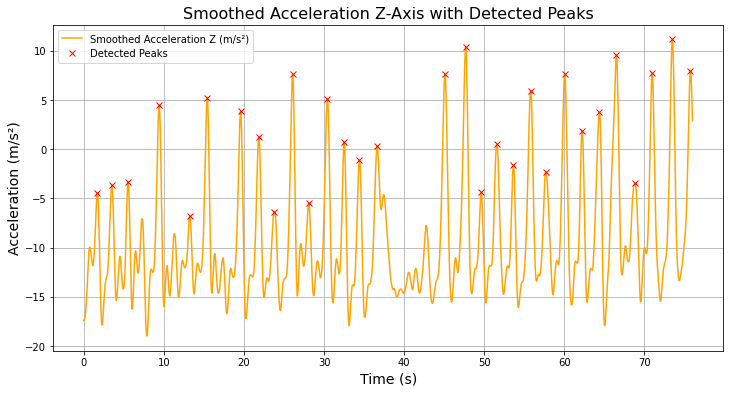

Mean: -9158.25, Std Dev: 6106.91, Max: 11157.72
Dynamic Height Threshold: -7021.04
Dynamic Distance Threshold: 80 samples
Total Detected Peaks: 30
Smoothed Gyro Z plot with peaks saved successfully in c:\Users\iddos\Desktop\UBC\BMEG 457\FORM24\esp IMU\peaks


In [23]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import os

timestamps = np.array(adjusted_timestamps)  # Ensure timestamps are NumPy array
gyro_z = np.array(smoothed_accel_z)  # Use smoothed gyro Z data

# Calculate dynamic thresholds
mean_value = np.mean(smoothed_accel_z)
std_dev = np.std(smoothed_accel_z)
max_value = np.max(smoothed_accel_z)

height_threshold = 0.9 * mean_value + 0.2 * std_dev
distance_threshold = 80

# Detect peaks
peaks, properties = find_peaks(
    smoothed_accel_z,
    height=height_threshold,
    distance=distance_threshold,
    prominence=0.5 * std_dev
)

# Plot smoothed gyro Z data with detected peaks (scaled by 1000 for display only)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, smoothed_accel_z / 1000, label='Smoothed Acceleration Z (m/s²)', color='orange')
plt.plot(timestamps[peaks], gyro_z[peaks] / 1000, 'rx', label='Detected Peaks')
plt.title('Smoothed Acceleration Z-Axis with Detected Peaks', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Acceleration (m/s²)', fontsize=14)
plt.legend()
plt.grid(True)

# Save the plot
save_path = os.path.join(os.getcwd(), "peaks")
os.makedirs(save_path, exist_ok=True)
plt.savefig(os.path.join(save_path, "Smoothed_Accel_Z_Peaks.png"), dpi=900, bbox_inches='tight')
plt.savefig(os.path.join(save_path, "Smoothed_Accel_Z_Peaks.svg"), bbox_inches='tight')  # Optional vector
plt.show()
plt.close()

# Print debugging info
print(f"Mean: {mean_value:.2f}, Std Dev: {std_dev:.2f}, Max: {max_value:.2f}")
print(f"Dynamic Height Threshold: {height_threshold:.2f}")
print(f"Dynamic Distance Threshold: {distance_threshold} samples")
print(f"Total Detected Peaks: {len(peaks)}")
print(f"Smoothed Gyro Z plot with peaks saved successfully in {save_path}")


Filtered timestamps count: 6071
Number of peaks: 30
First 10 peak indices: [ 135  280  441  750 1057 1231 1563 1745 1900 2081]
First 10 peak times: [ 1.694  3.508  5.536  9.404 13.236 15.417 19.582 21.861 23.808 26.067]


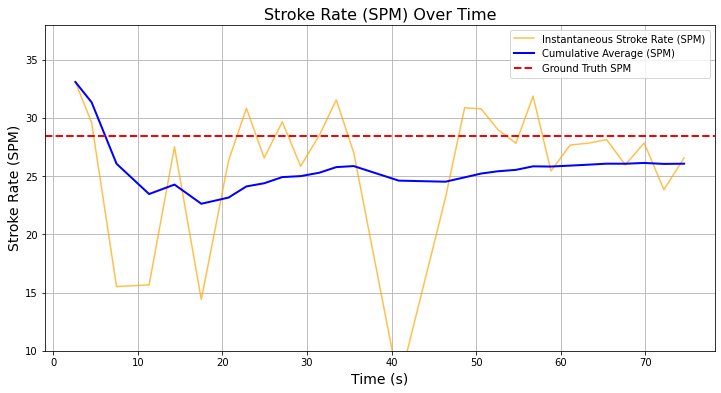

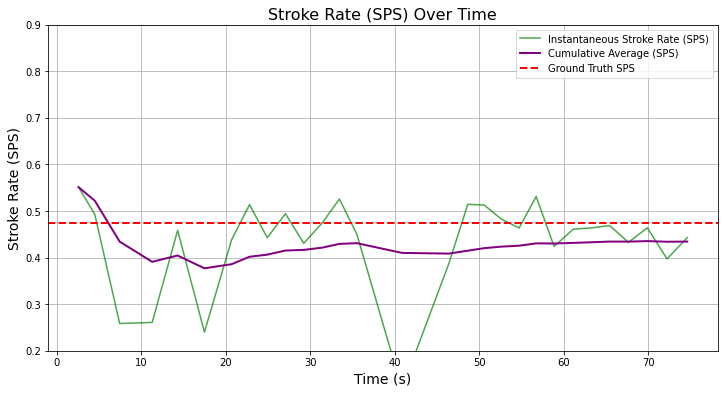

Final Cumulative Average Stroke Rate: 26.06 strokes/minute
Final Cumulative Average Stroke Rate: 0.43 strokes/second
Ground Truth Stroke Rate: 28.42 strokes/minute
Ground Truth Stroke Rate: 0.47 strokes/second


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Use already filtered adjusted_timestamps and smoothed_accel_z
timestamps = np.array(adjusted_timestamps)

# Debug prints
print(f"Filtered timestamps count: {len(timestamps)}")
print(f"Number of peaks: {len(peaks)}")
print(f"First 10 peak indices: {peaks[:10]}")
print(f"First 10 peak times: {timestamps[peaks[:10]]}")

# Calculate instantaneous stroke rate from peak intervals
peak_times = timestamps[peaks]
intervals = np.diff(peak_times)

# Calculate instantaneous stroke rates (SPM and SPS) from intervals between peaks
instantaneous_sps = 1 / intervals
instantaneous_spm = instantaneous_sps * 60
midpoints = (peak_times[:-1] + peak_times[1:]) / 2

# Cumulative averages
cumulative_spm = np.cumsum(instantaneous_spm) / np.arange(1, len(instantaneous_spm) + 1)
cumulative_sps = np.cumsum(instantaneous_sps) / np.arange(1, len(instantaneous_sps) + 1)

# Create output directory
save_dir = os.path.join(os.getcwd(), "graphs for presentation1 and 2")
os.makedirs(save_dir, exist_ok=True)

# Plot Stroke Rate (SPM)
plt.figure(figsize=(12, 6))
plt.plot(midpoints, instantaneous_spm, label='Instantaneous Stroke Rate (SPM)', color='orange', alpha=0.7)
plt.plot(midpoints, cumulative_spm, label='Cumulative Average (SPM)', color='blue', linewidth=2)
plt.axhline(y=ground_truth_spm, color='red', linestyle='--', linewidth=2, label='Ground Truth SPM')
plt.title('Stroke Rate (SPM) Over Time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Stroke Rate (SPM)', fontsize=14)
plt.ylim(10, 38)
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "presentation1.png"), dpi=300, bbox_inches='tight')
plt.show()

# Plot Stroke Rate (SPS)
plt.figure(figsize=(12, 6))
plt.plot(midpoints, instantaneous_sps, label='Instantaneous Stroke Rate (SPS)', color='green', alpha=0.7)
plt.plot(midpoints, cumulative_sps, label='Cumulative Average (SPS)', color='purple', linewidth=2)
plt.axhline(y=ground_truth_sps, color='red', linestyle='--', linewidth=2, label='Ground Truth SPS')
plt.title('Stroke Rate (SPS) Over Time', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Stroke Rate (SPS)', fontsize=14)
plt.ylim(0.2, 0.9)
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(save_dir, "presentation2.png"), dpi=900, bbox_inches='tight')
plt.show()

# Print final averages and ground truth
print(f"Final Cumulative Average Stroke Rate: {cumulative_spm[-1]:.2f} strokes/minute")
print(f"Final Cumulative Average Stroke Rate: {cumulative_sps[-1]:.2f} strokes/second")
print(f"Ground Truth Stroke Rate: {ground_truth_spm:.2f} strokes/minute")
print(f"Ground Truth Stroke Rate: {ground_truth_sps:.2f} strokes/second")
